In [1]:
import elementpath
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras, tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator#, load_img
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras import optimizers
import os

In [2]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [3]:
list_image = []
list_class = []

## Collecting Data From MaskDataset1

In [4]:
list_annotations = os.listdir("MaskDataset1/annotations")

In [5]:
for file in list_annotations:
    image = f"MaskDataset1/images/{file}"
    list_image.append(image.replace('.xml', '.png'))
    tree = ET.parse(f"MaskDataset1/annotations/{file}")
    root = tree.getroot()
    list_class.append(root[4][0].text)

## Collecting Data From MaskDataset2

In [6]:
list_withmask1 = os.listdir("MaskDataset2/with_mask")
list_withoutmask1 = os.listdir("MaskDataset2/without_mask")

In [7]:
for file in list_withmask1:
    image = f"MaskDataset2/with_mask/{file}"
    list_image.append(image)
    list_class.append("with_mask")

In [8]:
for file in list_withoutmask1:
    image = f"MaskDataset2/without_mask/{file}"
    list_image.append(image)
    list_class.append("without_mask")

## Collecting Data From MaskDataset3

In [9]:
list_withmask2 = os.listdir("MaskDataset3/with_mask")
list_withoutmask2 = os.listdir("MaskDataset3/without_mask")
list_incorrectmask2 = os.listdir("MaskDataset3/mask_weared_incorrect")

In [10]:
for file in list_withmask2:
    image = f"MaskDataset3/with_mask/{file}"
    list_image.append(image)
    list_class.append("with_mask")

In [11]:
for file in list_withoutmask2:
    image = f"MaskDataset3/without_mask/{file}"
    list_image.append(image)
    list_class.append("without_mask")

In [12]:
for file in list_incorrectmask2:
    image = f"MaskDataset3/mask_weared_incorrect/{file}"
    list_image.append(image)
    list_class.append("mask_weared_incorrect")

## Analysing The Data

In [13]:
len(list_image)

11211

In [14]:
len(list_class)

11211

In [16]:
df = pd.DataFrame({
        'image': list_image,
        'class': list_class
     })

In [17]:
df.head()

,image,class
0,MaskDataset1/images/maksssksksss0.png,without_mask
1,MaskDataset1/images/maksssksksss1.png,with_mask
2,MaskDataset1/images/maksssksksss10.png,with_mask
3,MaskDataset1/images/maksssksksss100.png,with_mask
4,MaskDataset1/images/maksssksksss101.png,with_mask


In [18]:
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size_gen = 32

<AxesSubplot:>

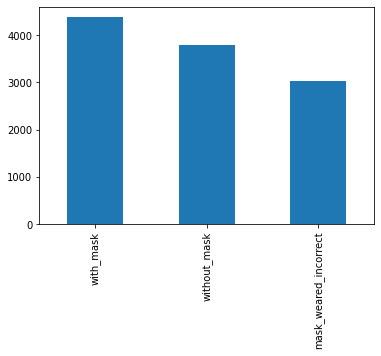

In [19]:
df['class'].value_counts().plot.bar()

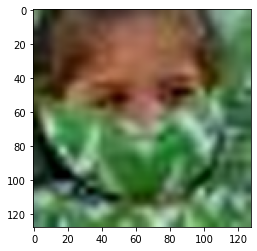

In [20]:
# Displaying a random image
sample = random.choice(list_image)
image = load_img(f"{sample}")
plt.imshow(image)

In [21]:
#Splitting the data into test and train
train, test = train_test_split(df, test_size=0.2, random_state=42)
total_train = train.shape[0]
total_val = test.shape[0]

In [22]:
# Using Image Augmentation to create more images for tarining and rescale all images by 255 (To make values of cell range from 0-1)
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

In [23]:
train_gen = datagen.flow_from_dataframe(train,
                                        directory = None,
                                        x_col = 'image',
                                        y_col = 'class',
                                        target_size = IMAGE_SIZE,
                                        batch_size = batch_size_gen)

Found 8968 validated image filenames belonging to 3 classes.


In [24]:
# Rescaling all testing images by 255
datagen_test = ImageDataGenerator(rescale=1./255)

In [25]:
test_gen = datagen_test.flow_from_dataframe(test,
                                            directory = None,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = IMAGE_SIZE,
                                            batch_size = batch_size_gen)

Found 2243 validated image filenames belonging to 3 classes.


In [26]:
train_gen

In [27]:
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
#Creating the sequential model used to train the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [29]:
#Creating a checkpointer to save the model locally with best validation accuracy
path_to_model="Models"
path_to_logs = "Logs"
checkpointer_new = keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/First_Test.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [30]:
history = model.fit(train_gen, 
          epochs=30, 
          validation_data = test_gen, 
          steps_per_epoch = total_train/batch_size_gen, 
          validation_steps = total_val/batch_size_gen,
          callbacks=[checkpointer_new]
          )

Epoch 1/30
281/280 [==============================] - ETA: 0s - loss: 0.5963 - accuracy: 0.7498
Epoch 1: val_accuracy improved from -inf to 0.86090, saving model to Models\First_Test.h5
280/280 [==============================] - 155s 519ms/step - loss: 0.5963 - accuracy: 0.7498 - val_loss: 0.3653 - val_accuracy: 0.8609
Epoch 2/30
281/280 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8732
Epoch 2: val_accuracy improved from 0.86090 to 0.87740, saving model to Models\First_Test.h5
280/280 [==============================] - 143s 509ms/step - loss: 0.3403 - accuracy: 0.8732 - val_loss: 0.3120 - val_accuracy: 0.8774
Epoch 3/30
281/280 [==============================] - ETA: 0s - loss: 0.2533 - accuracy: 0.9103
Epoch 3: val_accuracy improved from 0.87740 to 0.89612, saving model to Models\First_Test.h5
280/280 [==============================] - 142s 507ms/step - loss: 0.2533 - accuracy: 0.9103 - val_loss: 0.2708 - val_accuracy: 0.8961
Epoch 4/30
281/280 [===========

Epoch 28/30
281/280 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9797
Epoch 28: val_accuracy did not improve from 0.97682
280/280 [==============================] - 133s 472ms/step - loss: 0.0590 - accuracy: 0.9797 - val_loss: 0.1068 - val_accuracy: 0.9710
Epoch 29/30
281/280 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9749
Epoch 29: val_accuracy did not improve from 0.97682
280/280 [==============================] - 143s 509ms/step - loss: 0.0762 - accuracy: 0.9749 - val_loss: 0.0821 - val_accuracy: 0.9737
Epoch 30/30
281/280 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9777
Epoch 30: val_accuracy improved from 0.97682 to 0.97771, saving model to Models\First_Test.h5
280/280 [==============================] - 143s 510ms/step - loss: 0.0662 - accuracy: 0.9777 - val_loss: 0.0757 - val_accuracy: 0.9777


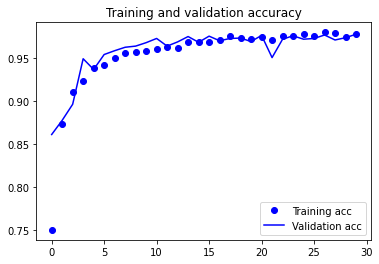

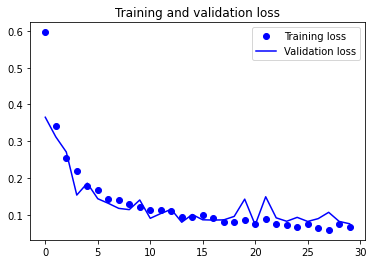

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Draw Activation Maps

In [3]:
modelpath = "Models/First_Test.h5"
model = keras.models.load_model(modelpath)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = load_img("MaskDataset1/images/maksssksksss106.png", target_size=(200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 200, 200, 3)


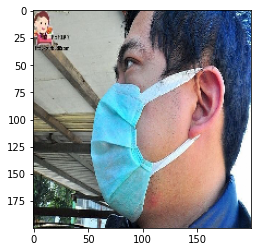

In [14]:
plt.imshow(img_tensor[0])
plt.show()

In [15]:
from keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

This is not needed in the training of the model is done to satiate curiusoity.
Activation maps show the output of each layer of the model on an imput and while this is soething we cannot describe visually, and is generally giesswork, we can try to understand what each layer in the model is trying to do.
In the activation layers drawn, it seems in the first layer, the aks is ebing isolated. By the layer max_pooling2d_2, it seems that the model has successfully isolalated the mask in the picture.

1/1 [==============================] - 0s 120ms/step


C:\Users\Archit Jain\AppData\Local\Temp\ipykernel_4180\585950860.py:28: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


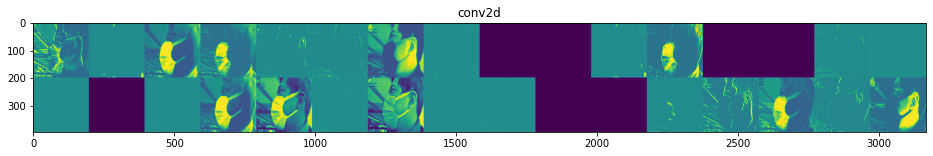

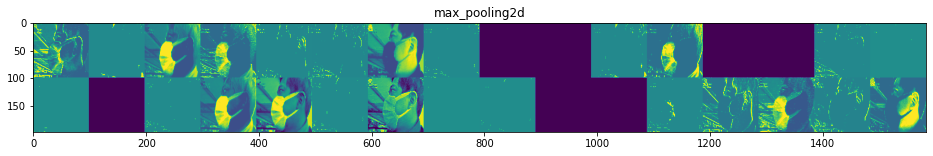

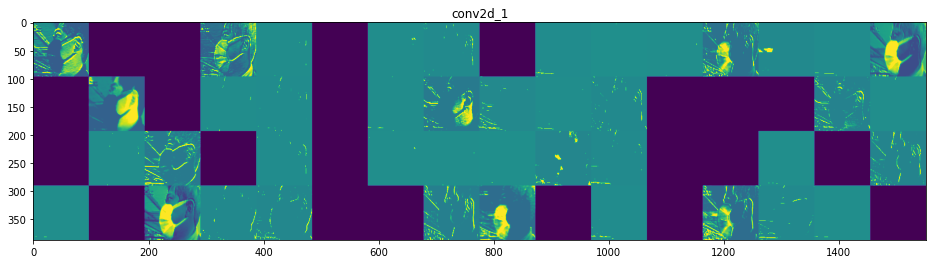

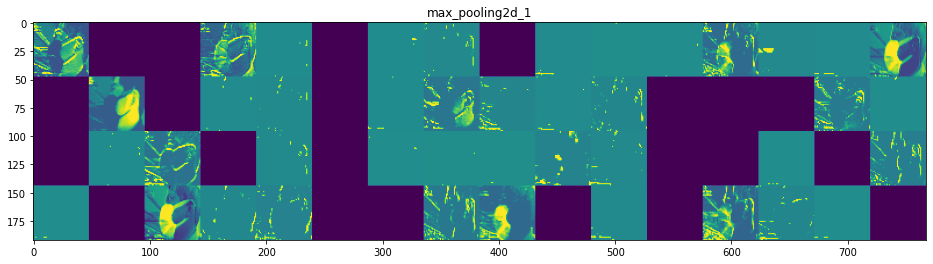

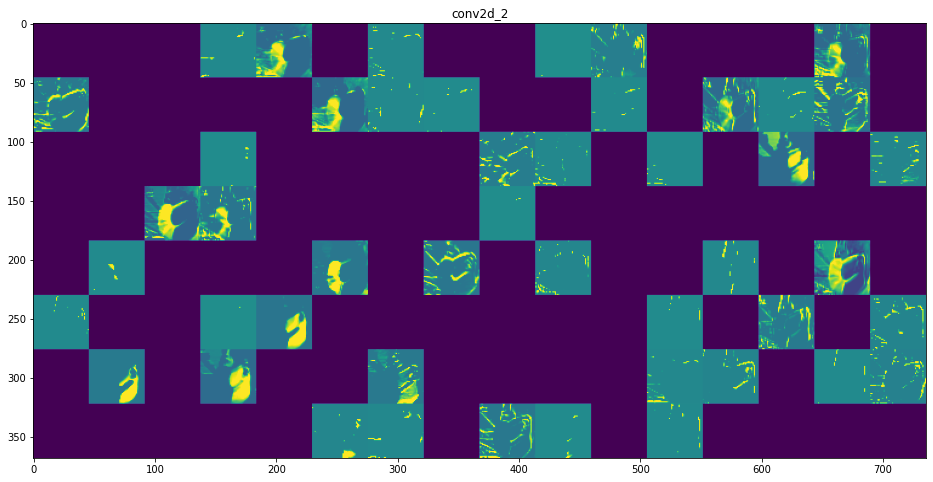

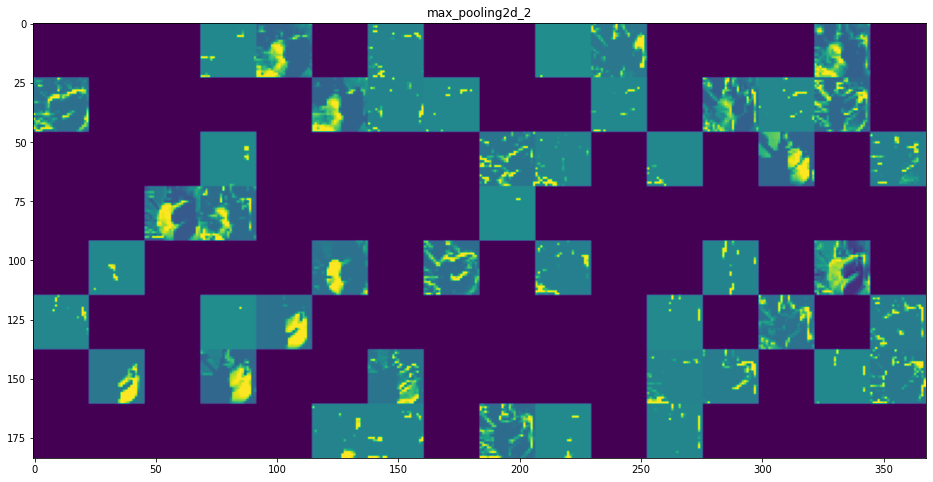

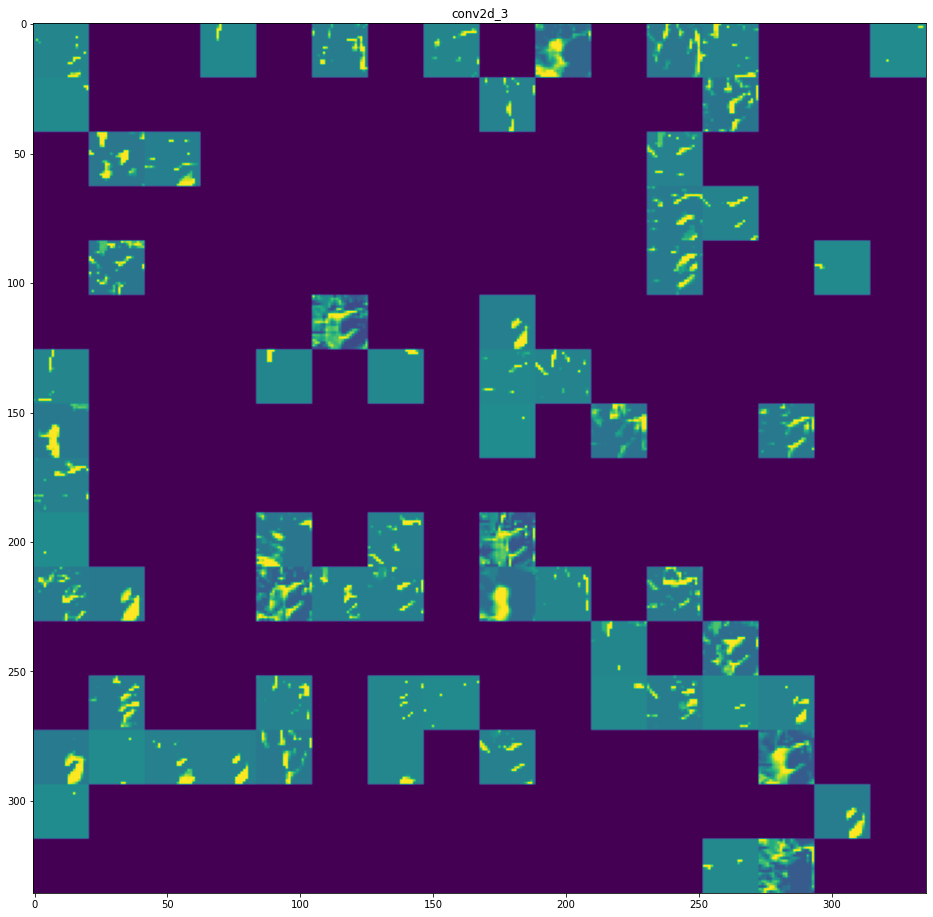

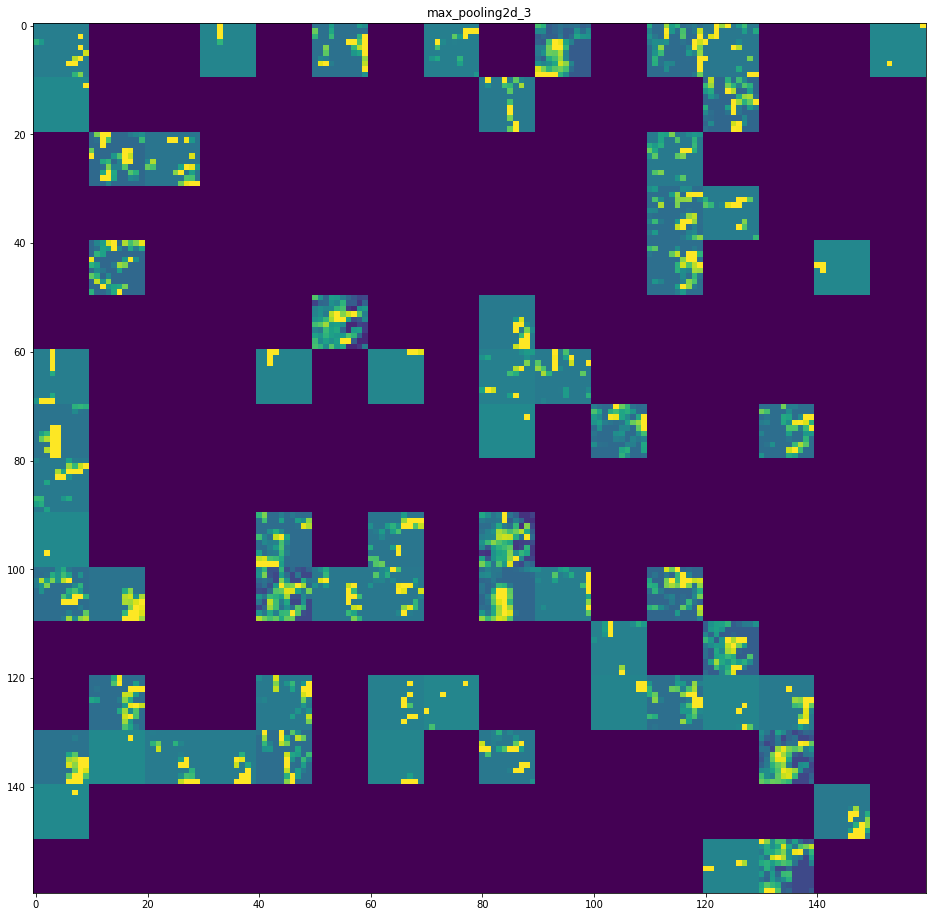

In [16]:
activations = activation_model.predict(img_tensor)
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()